In [1]:
# from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,
                             f1_score, precision_score, recall_score)
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
## Import data split and preprocessed in attached notebooks
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv')

In [3]:
y_train = y_train.health.apply(lambda x: 1 if x==2 else 0)
y_test = y_test.health.apply(lambda x: 1 if x==2 else 0)

In [4]:
def score_retriever(true_results, predictions):
    precision = precision_score(true_results, predictions) * 100
    recall = recall_score(true_results, predictions) * 100
    accuracy = accuracy_score(true_results, predictions) * 100
    f1 = f1_score(true_results, predictions) * 100
    return precision, recall, accuracy, f1

In [5]:
algorithm_scores = pd.DataFrame(columns=['Model', 'Train Precision', 'Train Recall', 'Train Accuracy', 'Train F1_Score',
                                         'Test Precision', 'Test Recall', 'Test Accuracy', 'Test F1_Score'])

### Decision Tree

In [6]:
dt_classifier_default_params = DecisionTreeClassifier(random_state=42)
dt_classifier_baseline_score = np.mean(cross_val_score(dt_classifier_default_params,
                                                       X_train, y_train.values.ravel(), cv=3))
dt_classifier_baseline_score

0.7933579567582507

In [7]:
dt_classifier_default_params.fit(X_train, y_train.values.ravel())
dt_classifier_baseline_predictions_trn = dt_classifier_default_params.predict(X_train)
dt_classifier_baseline_predictions = dt_classifier_default_params.predict(X_test)

In [8]:
print(classification_report(y_train, dt_classifier_baseline_predictions_trn))
print(classification_report(y_test, dt_classifier_baseline_predictions))

              precision    recall  f1-score   support

           0       0.74      0.21      0.33     30445
           1       0.84      0.98      0.91    128753

    accuracy                           0.83    159198
   macro avg       0.79      0.60      0.62    159198
weighted avg       0.82      0.83      0.79    159198

              precision    recall  f1-score   support

           0       0.38      0.11      0.17     10106
           1       0.82      0.96      0.88     42960

    accuracy                           0.80     53066
   macro avg       0.60      0.54      0.53     53066
weighted avg       0.74      0.80      0.75     53066



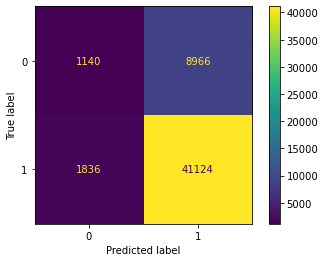

In [9]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, dt_classifier_baseline_predictions)).plot();

In [10]:
algorithm_scores = algorithm_scores.append({'Model': 'Decision Tree Baseline',
                                        'Train Precision': score_retriever(y_train, dt_classifier_baseline_predictions_trn)[0],
                                        'Train Recall': score_retriever(y_train, dt_classifier_baseline_predictions_trn)[1],
                                        'Train Accuracy': score_retriever(y_train, dt_classifier_baseline_predictions_trn)[2],
                                        'Train F1_Score': score_retriever(y_train, dt_classifier_baseline_predictions_trn)[3],
                                        'Test Precision': score_retriever(y_test, dt_classifier_baseline_predictions)[0],
                                        'Test Recall': score_retriever(y_test, dt_classifier_baseline_predictions)[1],
                                        'Test Accuracy': score_retriever(y_test, dt_classifier_baseline_predictions)[2],
                                        'Test F1_Score': score_retriever(y_test, dt_classifier_baseline_predictions)[3]},
                                        ignore_index=True)

In [11]:
dt_classifier_balanced = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_classifier_balanced_score = np.mean(cross_val_score(dt_classifier_balanced,
                                                       X_train, y_train.values.ravel(), cv=3))
dt_classifier_balanced_score

0.654744406336763

In [12]:
dt_classifier_balanced.fit(X_train, y_train.values.ravel())
dt_classifier_balanced_predictions_trn = dt_classifier_balanced.predict(X_train)
dt_classifier_balanced_predictions = dt_classifier_balanced.predict(X_test)

In [13]:
print(classification_report(y_train, dt_classifier_balanced_predictions_trn))
print(classification_report(y_test, dt_classifier_balanced_predictions))

              precision    recall  f1-score   support

           0       0.33      0.55      0.42     30445
           1       0.87      0.74      0.80    128753

    accuracy                           0.70    159198
   macro avg       0.60      0.65      0.61    159198
weighted avg       0.77      0.70      0.73    159198

              precision    recall  f1-score   support

           0       0.25      0.40      0.31     10106
           1       0.83      0.71      0.77     42960

    accuracy                           0.65     53066
   macro avg       0.54      0.56      0.54     53066
weighted avg       0.72      0.65      0.68     53066



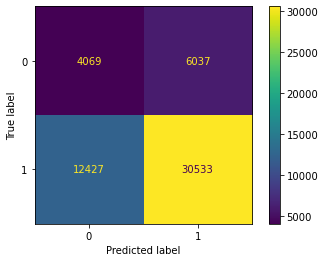

In [14]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, dt_classifier_balanced_predictions)).plot();

In [15]:
algorithm_scores = algorithm_scores.append({'Model': 'Decision Tree Balanced',
                                        'Train Precision': score_retriever(y_train, dt_classifier_balanced_predictions_trn)[0],
                                        'Train Recall': score_retriever(y_train, dt_classifier_balanced_predictions_trn)[1],
                                        'Train Accuracy': score_retriever(y_train, dt_classifier_balanced_predictions_trn)[2],
                                        'Train F1_Score': score_retriever(y_train, dt_classifier_balanced_predictions_trn)[3],
                                        'Test Precision': score_retriever(y_test, dt_classifier_balanced_predictions)[0],
                                        'Test Recall': score_retriever(y_test, dt_classifier_balanced_predictions)[1],
                                        'Test Accuracy': score_retriever(y_test, dt_classifier_balanced_predictions)[2],
                                        'Test F1_Score': score_retriever(y_test, dt_classifier_balanced_predictions)[3]},
                                        ignore_index=True)

In [16]:
dt_param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
}

In [17]:
dt_grid_search = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=42), dt_param_grid, cv=3, n_jobs=-1)
dt_grid_search = dt_grid_search.fit(X_train, y_train.values.ravel())

In [18]:
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [19]:
dt_classifier_best_params = DecisionTreeClassifier(class_weight='balanced',
                                                   criterion=dt_grid_search.best_params_['criterion'],
                                                   max_depth=dt_grid_search.best_params_['max_depth'],
                                                   min_samples_leaf=dt_grid_search.best_params_['min_samples_leaf'],
                                                   min_samples_split=dt_grid_search.best_params_['min_samples_split'],
                                                   random_state=42)

In [20]:
dt_classifier_best_params.fit(X_train, y_train.values.ravel())
dt_best_parameters_predictions_trn = dt_classifier_best_params.predict(X_train)
dt_best_parameters_predictions = dt_classifier_best_params.predict(X_test)

In [21]:
print(classification_report(y_train, dt_best_parameters_predictions_trn))
print(classification_report(y_test, dt_best_parameters_predictions))

              precision    recall  f1-score   support

           0       0.24      0.53      0.33     30445
           1       0.84      0.60      0.70    128753

    accuracy                           0.58    159198
   macro avg       0.54      0.56      0.51    159198
weighted avg       0.73      0.58      0.63    159198

              precision    recall  f1-score   support

           0       0.24      0.53      0.33     10106
           1       0.85      0.60      0.70     42960

    accuracy                           0.59     53066
   macro avg       0.54      0.57      0.52     53066
weighted avg       0.73      0.59      0.63     53066



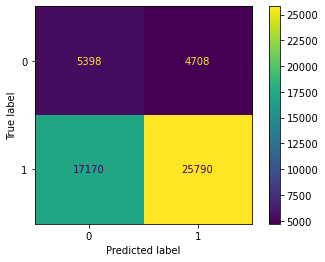

In [22]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, dt_best_parameters_predictions)).plot();

In [23]:
algorithm_scores = algorithm_scores.append({'Model': 'Decision Tree Tuned',
                                        'Train Precision': score_retriever(y_train, dt_best_parameters_predictions_trn)[0],
                                        'Train Recall': score_retriever(y_train, dt_best_parameters_predictions_trn)[1],
                                        'Train Accuracy': score_retriever(y_train, dt_best_parameters_predictions_trn)[2],
                                        'Train F1_Score': score_retriever(y_train, dt_best_parameters_predictions_trn)[3],
                                        'Test Precision': score_retriever(y_test, dt_best_parameters_predictions)[0],
                                        'Test Recall': score_retriever(y_test, dt_best_parameters_predictions)[1],
                                        'Test Accuracy': score_retriever(y_test, dt_best_parameters_predictions)[2],
                                        'Test F1_Score': score_retriever(y_test, dt_best_parameters_predictions)[3]},
                                        ignore_index=True)

### Random Forest 

In [24]:
rf_classifier_default_params = RandomForestClassifier(random_state=42)
rf_classifier_baseline_score = np.mean(cross_val_score(rf_classifier_default_params,
                                                       X_train, y_train.values.ravel(), cv=3))
rf_classifier_baseline_score

0.8023216372064975

In [25]:
rf_classifier_default_params.fit(X_train, y_train.values.ravel())
rf_classifier_baseline_predictions_trn = rf_classifier_default_params.predict(X_train)
rf_classifier_baseline_predictions = rf_classifier_default_params.predict(X_test)

In [26]:
print(classification_report(y_train, rf_classifier_baseline_predictions_trn))
print(classification_report(y_test, rf_classifier_baseline_predictions))

              precision    recall  f1-score   support

           0       0.80      0.18      0.30     30445
           1       0.84      0.99      0.91    128753

    accuracy                           0.83    159198
   macro avg       0.82      0.59      0.60    159198
weighted avg       0.83      0.83      0.79    159198

              precision    recall  f1-score   support

           0       0.44      0.09      0.15     10106
           1       0.82      0.97      0.89     42960

    accuracy                           0.80     53066
   macro avg       0.63      0.53      0.52     53066
weighted avg       0.75      0.80      0.75     53066



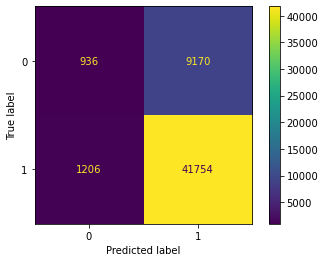

In [27]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, rf_classifier_baseline_predictions)).plot();

In [28]:
algorithm_scores = algorithm_scores.append({'Model': 'Random Forest Baseline',
                                        'Train Precision': score_retriever(y_train, rf_classifier_baseline_predictions_trn)[0],
                                        'Train Recall': score_retriever(y_train, rf_classifier_baseline_predictions_trn)[1],
                                        'Train Accuracy': score_retriever(y_train, rf_classifier_baseline_predictions_trn)[2],
                                        'Train F1_Score': score_retriever(y_train, rf_classifier_baseline_predictions_trn)[3],
                                        'Test Precision': score_retriever(y_test, rf_classifier_baseline_predictions)[0],
                                        'Test Recall': score_retriever(y_test, rf_classifier_baseline_predictions)[1],
                                        'Test Accuracy': score_retriever(y_test, rf_classifier_baseline_predictions)[2],
                                        'Test F1_Score': score_retriever(y_test, rf_classifier_baseline_predictions)[3]},
                                                        ignore_index=True)

In [29]:
rf_classifier_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_classifier_balanced_score = np.mean(cross_val_score(rf_classifier_balanced,
                                                       X_train, y_train.values.ravel(), cv=3))
rf_classifier_balanced_score

0.6783313860726894

In [30]:
rf_classifier_balanced.fit(X_train, y_train.values.ravel())
rf_classifier_balanced_predictions_trn = rf_classifier_balanced.predict(X_train)
rf_classifier_balanced_predictions = rf_classifier_balanced.predict(X_test)

In [31]:
print(classification_report(y_train, rf_classifier_balanced_predictions_trn))
print(classification_report(y_test, rf_classifier_balanced_predictions))

              precision    recall  f1-score   support

           0       0.34      0.52      0.41     30445
           1       0.87      0.76      0.81    128753

    accuracy                           0.72    159198
   macro avg       0.61      0.64      0.61    159198
weighted avg       0.77      0.72      0.74    159198

              precision    recall  f1-score   support

           0       0.25      0.37      0.30     10106
           1       0.83      0.74      0.78     42960

    accuracy                           0.67     53066
   macro avg       0.54      0.56      0.54     53066
weighted avg       0.72      0.67      0.69     53066



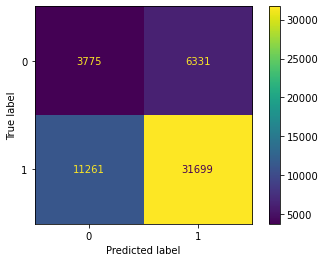

In [32]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, rf_classifier_balanced_predictions)).plot();

In [33]:
algorithm_scores = algorithm_scores.append({'Model': 'Random Forest Balanced',
                                        'Train Precision': score_retriever(y_train, rf_classifier_balanced_predictions_trn)[0],
                                        'Train Recall': score_retriever(y_train, rf_classifier_balanced_predictions_trn)[1],
                                        'Train Accuracy': score_retriever(y_train, rf_classifier_balanced_predictions_trn)[2],
                                        'Train F1_Score': score_retriever(y_train, rf_classifier_balanced_predictions_trn)[3],
                                        'Test Precision': score_retriever(y_test, rf_classifier_balanced_predictions)[0],
                                        'Test Recall': score_retriever(y_test, rf_classifier_balanced_predictions)[1],
                                        'Test Accuracy': score_retriever(y_test, rf_classifier_balanced_predictions)[2],
                                        'Test F1_Score': score_retriever(y_test, rf_classifier_balanced_predictions)[3]},
                                        ignore_index=True)

In [34]:
rf_param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [10, 50, 100]
}

In [35]:
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), rf_param_grid, cv=3, n_jobs=-1)
rf_grid_search = rf_grid_search.fit(X_train, y_train.values.ravel())

In [36]:
rf_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 10}

In [37]:
rf_classifier_best_params = RandomForestClassifier(class_weight='balanced',
                                                   criterion=rf_grid_search.best_params_['criterion'],
                                                   max_depth=rf_grid_search.best_params_['max_depth'],
                                                   min_samples_leaf=rf_grid_search.best_params_['min_samples_leaf'],
                                                   min_samples_split=rf_grid_search.best_params_['min_samples_split'],
                                                   n_estimators=rf_grid_search.best_params_['n_estimators'],
                                                   random_state=42)

In [38]:
rf_classifier_best_params.fit(X_train, y_train.values.ravel())
rf_best_parameters_predictions_trn = rf_classifier_best_params.predict(X_train)
rf_best_parameters_predictions = rf_classifier_best_params.predict(X_test)

In [39]:
print(classification_report(y_train, rf_best_parameters_predictions_trn))
print(classification_report(y_test, rf_best_parameters_predictions))

              precision    recall  f1-score   support

           0       0.31      0.31      0.31     30445
           1       0.84      0.84      0.84    128753

    accuracy                           0.74    159198
   macro avg       0.57      0.57      0.57    159198
weighted avg       0.74      0.74      0.74    159198

              precision    recall  f1-score   support

           0       0.31      0.31      0.31     10106
           1       0.84      0.84      0.84     42960

    accuracy                           0.74     53066
   macro avg       0.58      0.57      0.58     53066
weighted avg       0.74      0.74      0.74     53066



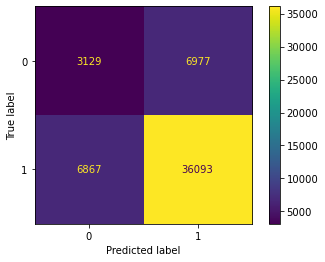

In [40]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, rf_best_parameters_predictions)).plot();

In [41]:
algorithm_scores = algorithm_scores.append({'Model': 'Random Forest Tuned',
                                        'Train Precision': score_retriever(y_train, rf_best_parameters_predictions_trn)[0],
                                        'Train Recall': score_retriever(y_train, rf_best_parameters_predictions_trn)[1],
                                        'Train Accuracy': score_retriever(y_train, rf_best_parameters_predictions_trn)[2],
                                        'Train F1_Score': score_retriever(y_train, rf_best_parameters_predictions_trn)[3],
                                        'Test Precision': score_retriever(y_test, rf_best_parameters_predictions)[0],
                                        'Test Recall': score_retriever(y_test, rf_best_parameters_predictions)[1],
                                        'Test Accuracy': score_retriever(y_test, rf_best_parameters_predictions)[2],
                                        'Test F1_Score': score_retriever(y_test, rf_best_parameters_predictions)[3]},
                                        ignore_index=True)

In [42]:
rf_feature_importance_dict = dict(zip(X_train.columns, rf_classifier_best_params.feature_importances_))

In [43]:
dummied_categories = ['steward', 'guards', 'borough']
for name in dummied_categories:
    category_sum = sum([value for key, value in rf_feature_importance_dict.items() if name in key])
    remove_keys = [key for key in rf_feature_importance_dict.keys() if name in key]
    for key in remove_keys:
        rf_feature_importance_dict.pop(key)
    rf_feature_importance_dict[name] = category_sum

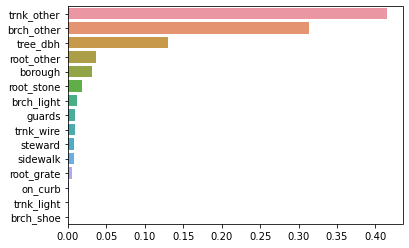

In [44]:
importances = pd.Series(rf_feature_importance_dict.values(), 
                        index=rf_feature_importance_dict.keys()).sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index);

### eXtreme Gradient Boosting

In [45]:
xgb_classifier_default_params = XGBClassifier(eval_metric='mlogloss', random_state=42, use_label_encoder=False)
xgb_classifier_baseline_score = np.mean(cross_val_score(xgb_classifier_default_params,
                                                        X_train, y_train.values.ravel(), cv=3))
xgb_classifier_baseline_score

0.8115993919521602

In [46]:
xgb_classifier_default_params.fit(X_train, y_train.values.ravel())
xgb_classifier_baseline_predictions_trn = xgb_classifier_default_params.predict(X_train)
xgb_classifier_baseline_predictions = xgb_classifier_default_params.predict(X_test)

In [47]:
print('Model: XGBoost Baseline')
print(classification_report(y_train, xgb_classifier_baseline_predictions_trn))
print(classification_report(y_test, xgb_classifier_baseline_predictions))

Model: XGBoost Baseline
              precision    recall  f1-score   support

           0       0.70      0.08      0.14     30445
           1       0.82      0.99      0.90    128753

    accuracy                           0.82    159198
   macro avg       0.76      0.54      0.52    159198
weighted avg       0.80      0.82      0.75    159198

              precision    recall  f1-score   support

           0       0.59      0.07      0.12     10106
           1       0.82      0.99      0.90     42960

    accuracy                           0.81     53066
   macro avg       0.70      0.53      0.51     53066
weighted avg       0.77      0.81      0.75     53066



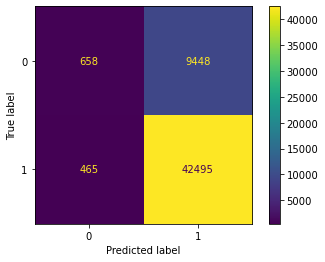

In [48]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, xgb_classifier_baseline_predictions)).plot();

In [49]:
algorithm_scores = algorithm_scores.append({'Model': 'XGBoost Baseline',
                                        'Train Precision': score_retriever(y_train, xgb_classifier_baseline_predictions_trn)[0],
                                        'Train Recall': score_retriever(y_train, xgb_classifier_baseline_predictions_trn)[1],
                                        'Train Accuracy': score_retriever(y_train, xgb_classifier_baseline_predictions_trn)[2],
                                        'Train F1_Score': score_retriever(y_train, xgb_classifier_baseline_predictions_trn)[3],
                                        'Test Precision': score_retriever(y_test, xgb_classifier_baseline_predictions)[0],
                                        'Test Recall': score_retriever(y_test, xgb_classifier_baseline_predictions)[1],
                                        'Test Accuracy': score_retriever(y_test, xgb_classifier_baseline_predictions)[2],
                                        'Test F1_Score': score_retriever(y_test, xgb_classifier_baseline_predictions)[3]},
                                        ignore_index=True)

In [50]:
xgb_classifier_balanced = XGBClassifier(class_weight='balanced', eval_metric='mlogloss',
                                        random_state=42, use_label_encoder=False)
xgb_classifier_balanced_score = np.mean(cross_val_score(xgb_classifier_balanced,
                                                       X_train, y_train.values.ravel(), cv=3))
xgb_classifier_balanced_score

[02:25:54] WARNING: ..\src\learner.cc:541: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:26:03] WARNING: ..\src\learner.cc:541: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:26:15] WARNING: ..\src\learner.cc:541: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.8115993919521602

In [51]:
xgb_classifier_balanced.fit(X_train, y_train.values.ravel())
xgb_classifier_balanced_predictions_trn = xgb_classifier_balanced.predict(X_train)
xgb_classifier_balanced_predictions = xgb_classifier_balanced.predict(X_test)

[02:26:27] WARNING: ..\src\learner.cc:541: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [52]:
print(classification_report(y_train, xgb_classifier_balanced_predictions_trn))
print(classification_report(y_test, xgb_classifier_balanced_predictions))

              precision    recall  f1-score   support

           0       0.70      0.08      0.14     30445
           1       0.82      0.99      0.90    128753

    accuracy                           0.82    159198
   macro avg       0.76      0.54      0.52    159198
weighted avg       0.80      0.82      0.75    159198

              precision    recall  f1-score   support

           0       0.59      0.07      0.12     10106
           1       0.82      0.99      0.90     42960

    accuracy                           0.81     53066
   macro avg       0.70      0.53      0.51     53066
weighted avg       0.77      0.81      0.75     53066



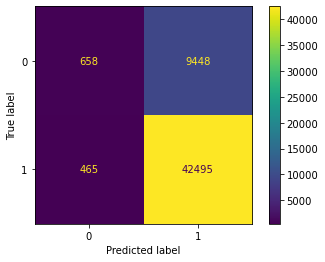

In [53]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, xgb_classifier_balanced_predictions)).plot();

In [54]:
algorithm_scores = algorithm_scores.append({'Model': 'XGBoost Balanced',
                                        'Train Precision': score_retriever(y_train, xgb_classifier_balanced_predictions_trn)[0],
                                        'Train Recall': score_retriever(y_train, xgb_classifier_balanced_predictions_trn)[1],
                                        'Train Accuracy': score_retriever(y_train, xgb_classifier_balanced_predictions_trn)[2],
                                        'Train F1_Score': score_retriever(y_train, xgb_classifier_balanced_predictions_trn)[3],
                                        'Test Precision': score_retriever(y_test, xgb_classifier_balanced_predictions)[0],
                                        'Test Recall': score_retriever(y_test, xgb_classifier_balanced_predictions)[1],
                                        'Test Accuracy': score_retriever(y_test, xgb_classifier_balanced_predictions)[2],
                                        'Test F1_Score': score_retriever(y_test, xgb_classifier_balanced_predictions)[3]},
                                        ignore_index=True)

In [55]:
xgb_param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'n_estimators': [100],
    'subsample': [0.5, 0.7]
}

In [56]:
xgb_grid_search = GridSearchCV(XGBClassifier(class_weight='balanced', eval_metric='mlogloss',
                                             random_state=42, use_label_encoder=False),
                                             xgb_param_grid, scoring='accuracy', cv=3)
xgb_grid_search = xgb_grid_search.fit(X_train, y_train.values.ravel())

[02:26:44] WARNING: ..\src\learner.cc:541: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:26:55] WARNING: ..\src\learner.cc:541: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:27:07] WARNING: ..\src\learner.cc:541: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:

In [57]:
xgb_grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.5}

In [58]:
xgb_classifier_best_params = XGBClassifier(learning_rate=xgb_grid_search.best_params_['learning_rate'],
                                           max_depth=xgb_grid_search.best_params_['max_depth'],
                                           min_child_weight=xgb_grid_search.best_params_['min_child_weight'],
                                           n_estimators=xgb_grid_search.best_params_['n_estimators'],
                                           subsample=xgb_grid_search.best_params_['subsample'],
                                           random_state=42, use_label_encoder=False)

In [59]:
xgb_classifier_best_params.fit(X_train, y_train)
xgb_best_parameters_predictions_trn = xgb_classifier_best_params.predict(X_train)
xgb_best_parameters_predictions = xgb_classifier_best_params.predict(X_test)

[02:31:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [60]:
print(classification_report(y_train, xgb_best_parameters_predictions_trn))
print(classification_report(y_test, xgb_best_parameters_predictions))

              precision    recall  f1-score   support

           0       0.69      0.07      0.12     30445
           1       0.82      0.99      0.90    128753

    accuracy                           0.82    159198
   macro avg       0.75      0.53      0.51    159198
weighted avg       0.79      0.82      0.75    159198

              precision    recall  f1-score   support

           0       0.61      0.06      0.11     10106
           1       0.82      0.99      0.90     42960

    accuracy                           0.81     53066
   macro avg       0.71      0.53      0.50     53066
weighted avg       0.78      0.81      0.75     53066



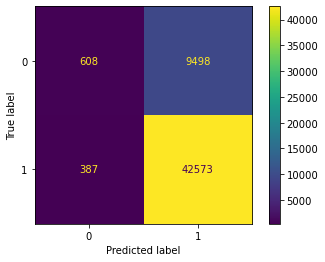

In [61]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, xgb_best_parameters_predictions)).plot();

In [62]:
algorithm_scores = algorithm_scores.append({'Model': 'XGBoost Tuned',
                                            'Train Precision': score_retriever(y_train, xgb_best_parameters_predictions_trn)[0],
                                            'Train Recall': score_retriever(y_train, xgb_best_parameters_predictions_trn)[1],
                                            'Train Accuracy': score_retriever(y_train, xgb_best_parameters_predictions_trn)[2],
                                            'Train F1_Score': score_retriever(y_train, xgb_best_parameters_predictions_trn)[3],
                                            'Test Precision': score_retriever(y_test, xgb_best_parameters_predictions)[0],
                                            'Test Recall': score_retriever(y_test, xgb_best_parameters_predictions)[1],
                                            'Test Accuracy': score_retriever(y_test, xgb_best_parameters_predictions)[2],
                                            'Test F1_Score': score_retriever(y_test, xgb_best_parameters_predictions)[3]},
                                                        ignore_index=True)

In [63]:
algorithm_scores

,Model,Train Precision,Train Recall,Train Accuracy,Train F1_Score,Test Precision,Test Recall,Test Accuracy,Test F1_Score
0,Decision Tree Baseline,84.002098,98.288972,83.477179,90.585675,82.100220,95.726257,79.644217,88.391188
1,Decision Tree Balanced,87.434732,74.133418,70.463825,80.236551,83.491933,71.073091,65.205593,76.783604
2,Decision Tree Tuned,84.317643,59.656862,58.398347,69.875233,84.562922,60.032588,58.772095,70.216995
3,Random Forest Baseline,83.629202,98.936724,83.476551,90.641221,81.992774,97.192737,80.446991,88.948064
4,Random Forest Balanced,87.045571,76.283271,71.637206,81.309839,83.352616,73.787244,66.848830,78.278800
5,Random Forest Tuned,83.683018,84.043090,73.841380,83.862668,83.800789,84.015363,73.911733,83.907939
6,XGBoost Baseline,82.012315,99.209339,81.762334,89.794871,81.810831,98.917598,81.319489,89.554598
7,XGBoost Balanced,82.012315,99.209339,81.762334,89.794871,81.810831,98.917598,81.319489,89.554598
8,XGBoost Tuned,81.791549,99.312637,81.563211,89.704546,81.759521,99.099162,81.372253,89.598131


In [64]:
algorithm_scores.to_csv('data/two_class_scores.csv', index=False)